In [41]:
import numpy as np

from matplotlib import pyplot as plt

from sys import stderr

In [42]:
def read_contour_data(file: str):
    try:
        with open(file, "r") as f:
            return np.array([list(map(float, line.split())) for line in f.readlines()])
    except IOError as e:
        print(f"{e}", file=stderr)
        return np.array([])

In [43]:
def read_maxima_data(file: str):
    try:
        maxima = list()
        with open(file, "r") as f:
            lines = f.readlines()

            while len(lines) > 0:
                maximum = dict()
                line = lines.pop(0)
                assert line.startswith("Maximum")

                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("theta=")
                line = line.replace("theta=", "")
                line = line.replace("[", "").replace("]", "")
                maximum["theta"] = np.array(list(map(float, line.split(",")[:-1])))


                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("func_value=")
                line = line.replace("func_value=", "")
                maximum["func_value"] = float(line)

                line = lines.pop(0)
                line = line.replace(" ", "").replace("\n", "")
                assert line.startswith("grad=")
                line = line.replace("grad=", "")
                line = line.replace("[", "").replace("]", "")
                maximum["grad"] = np.array(list(map(float, line.split(",")[:-1])))


                line = lines.pop(0)
                assert len(line) == 1

                maxima.append(maximum)
        return maxima
    except IOError as e:
        print(f"{e}", file=stderr)
        return []

In [44]:
def read_hypercube_data(file: str):
    try:
        hypercubes = list()
        with open(file, "r") as f:
            lines = f.readlines()

            while len(lines) > 0:
                hc = list()

                line = lines.pop(0)
                assert line.startswith("{")

                for _ in range(2):
                    line = lines.pop(0)
                    line = line.replace(" ", "").replace("\n", "")
                    assert line.startswith("{") and line.endswith("},"), f"line: `{line}`"
                    line = line.replace("{", "").replace("},", "")
                    hc.append(tuple(map(float, line.split(","))))

                line = lines.pop(0)
                assert line.startswith("},")

                line = lines.pop(0)
                assert len(line) == 1

                hypercubes.append(hc)
        return hypercubes
    except IOError as e:
        print(f"{e}", file=stderr)
        return []

In [45]:
X = read_contour_data("../simpson_contour_x.txt")
Y = read_contour_data("../simpson_contour_y.txt")
Z = read_contour_data("../simpson_contour_z.txt")

# X = read_contour_data("simpson_contours/base_orth_llh_x.txt")
# Y = read_contour_data("simpson_contours/base_orth_llh_y.txt")
# Z = read_contour_data("simpson_contours/base_orth_llh_z.txt")

# X = read_contour_data("simpson_contours/neighbourhood_llh_x.txt")
# Y = read_contour_data("simpson_contours/neighbourhood_llh_y.txt")
# Z = read_contour_data("simpson_contours/neighbourhood_llh_z.txt")

# X = read_contour_data("simpson_contours/neighbourhood_orth_llh_x.txt")
# Y = read_contour_data("simpson_contours/neighbourhood_orth_llh_y.txt")
# Z = read_contour_data("simpson_contours/neighbourhood_orth_llh_z.txt")

In [46]:
maxima = read_maxima_data("../simpson_maxima.txt")
maxima_pos = np.array([maximum['theta'] for maximum in maxima])
maxima_vals = np.array([maximum['func_value'] for maximum in maxima])
if np.max(maxima_vals) != np.min(maxima_vals):
    maxima_vals = (maxima_vals - np.min(maxima_vals)) / (np.max(maxima_vals) - np.min(maxima_vals))
else:
    maxima_vals = np.ones_like(maxima_vals)

In [47]:
hypercubes = read_hypercube_data("../simpson_hypercubes.txt")
merged_hypercubes = read_hypercube_data("../simpson_merged_hypercubes.txt")

In [48]:
exp_max = np.array([
        [-1.0131994994102715, 12.10490214219407],
        [-0.9830126283202988, 21.952287862046717],
        [-0.9701539671910838, 32.041331137016655],
        [-1.0563025848476086, 42.05891543712361],
        [-0.9766557206768839, 51.95570631772517],
    ])
lin_reg_res = [1.397539222266859, 8.147479933806645]

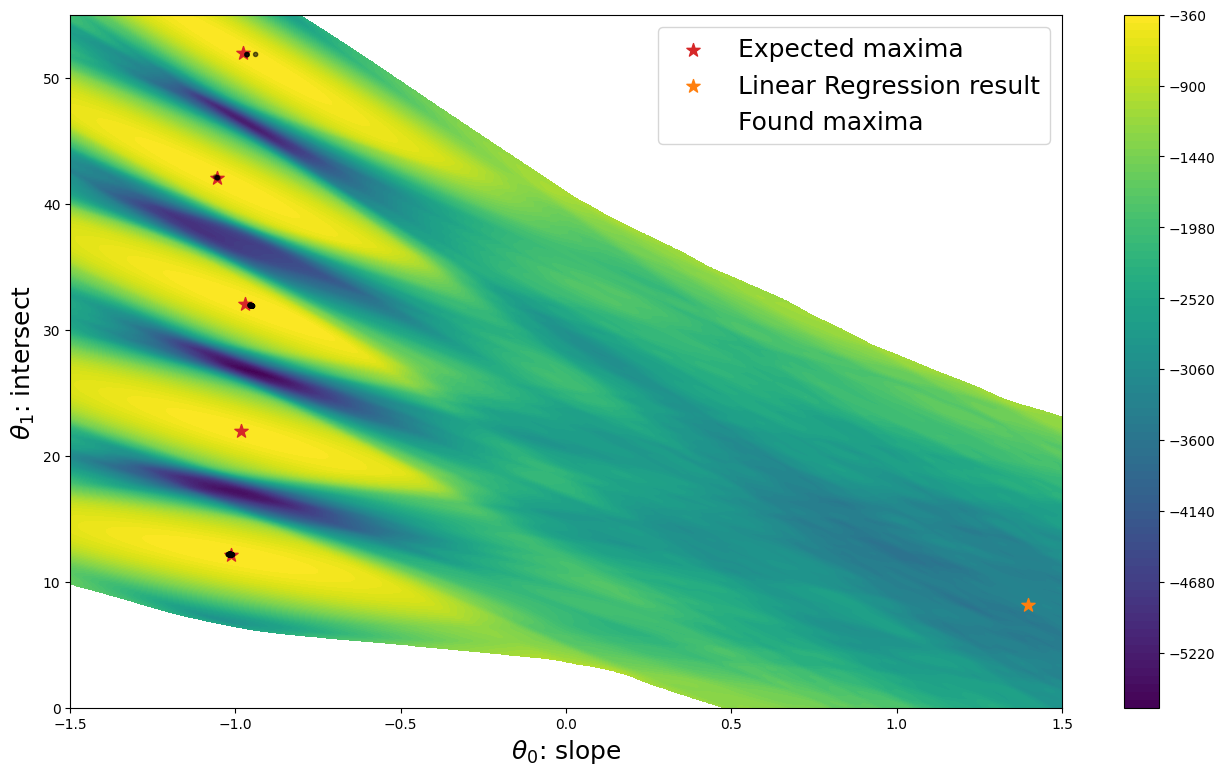

In [49]:
plt.figure(figsize=(16, 9))

CS = plt.contourf(X, Y, Z, levels=100)
plt.colorbar(CS)

plt.scatter(exp_max[:, 0], exp_max[:, 1], label="Expected maxima", color="tab:red", marker="*", s=100)
plt.scatter(lin_reg_res[0], lin_reg_res[1], label="Linear Regression result", color="tab:orange", marker="*", s=100)

plt.scatter(maxima_pos[:, 0], maxima_pos[:, 1], label="Found maxima", color="black", marker=".", alpha=maxima_vals)

plt.xlabel("$\\theta_0$: slope", fontsize=18)
plt.ylabel("$\\theta_1$: intersect", fontsize=18)
plt.legend(fontsize=18)

plt.show()

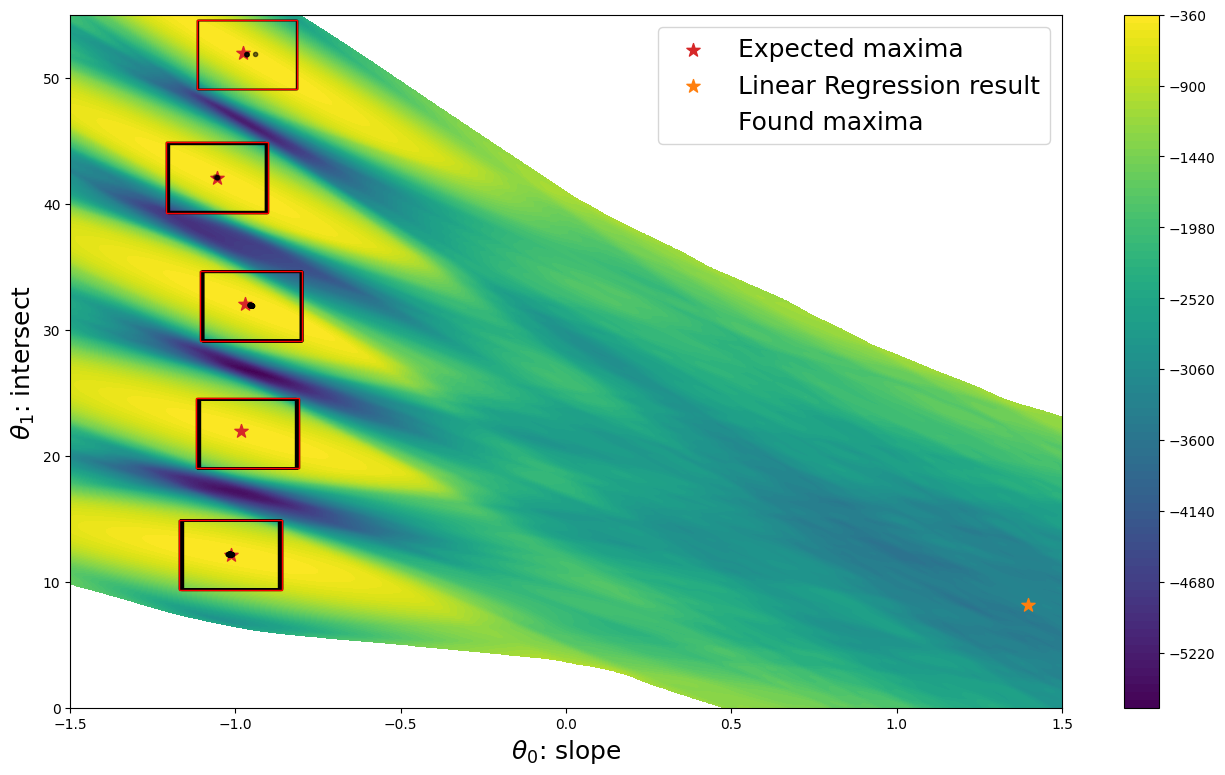

In [52]:
plt.figure(figsize=(16, 9))

CS = plt.contourf(X, Y, Z, levels=100)
plt.colorbar(CS)

plt.scatter(exp_max[:, 0], exp_max[:, 1], label="Expected maxima", color="tab:red", marker="*", s=100)
plt.scatter(lin_reg_res[0], lin_reg_res[1], label="Linear Regression result", color="tab:orange", marker="*", s=100)

plt.scatter(maxima_pos[:, 0], maxima_pos[:, 1], label="Found maxima", color="black", marker=".", alpha=maxima_vals)

for hc in hypercubes:
    rect = plt.Rectangle(
        xy=[hc[0][0], hc[1][0]],
        width=hc[0][1] - hc[0][0],
        height=hc[1][1] - hc[1][0],
        fc="none",
        ec="black"
    )
    plt.gca().add_patch(rect)

for hc in merged_hypercubes:
    rect = plt.Rectangle(
        xy=[hc[0][0], hc[1][0]],
        width=hc[0][1] - hc[0][0],
        height=hc[1][1] - hc[1][0],
        fc="none",
        ec="red"
    )
    plt.gca().add_patch(rect)


plt.xlabel("$\\theta_0$: slope", fontsize=18)
plt.ylabel("$\\theta_1$: intersect", fontsize=18)
plt.legend(fontsize=18)

# plt.savefig("../simpson_contour_high_learning_rate.jpg", dpi=300)

plt.show()